## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, I'll be working to understand the results of an A/B test run by an e-commerce website.  My goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted==1').user_id.nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('landing_page=="new_page" & group=="control"').shape[0] + df.query('landing_page=="old_page" & group=="treatment"').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no missing values in the dataframe.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(landing_page=="old_page" & group=="control") or (landing_page=="new_page" & group=="treatment")')
df2.shape

(290585, 5)

Now checking if the df2 dataframe has any rows with mismatched column values for **landing_page** and **group**

In [9]:
df2.query(
    '(landing_page=="new_page" & group=="control") or (landing_page=="old_page" & group=="treatment")'
    ).count()['user_id']

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Checking the frequency of the user_id column values
df2['user_id'].value_counts().head()

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

Verifying that I got the correct **user_id**

In [12]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

Following is the relevant information: the user with user_id **773192** was shown the new landing page, and did not convert.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
df2 = df2[df2['timestamp']!='2017-01-14 02:55:59.590927']
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [15]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.query('converted==1').user_id.count()/df2.user_id.count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2.query('group=="control" & converted==1').user_id.count() / df2.query('group=="control"').user_id.count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# Probability of an individual in treatment group being converted
df2.query(
    'group=="treatment" & converted==1').user_id.count() / df2.query(
    'group=="treatment"').user_id.count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page=="new_page"').user_id.count()/df2.shape[0]

0.50006194422266881

Looks like almost 50% of the people tested got served the new page.

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The treatment page conversion rate was 11.88%, while that of the control page was 12.04%. So we do not have sufficient evidence to say that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general. 


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} \leq p_{old}$$
$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [64]:
p_new = df2.query('converted == 1').user_id.count()/df2.user_id.count()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

For the null hypothesis we are assuming that the conversion rate is same for both the pages. So it doesn't matter which page we choose (in other words, p_new and p_old will be the same). We just need to find out the total conversion rate from the cleaned data set. Following is another way of writing the query.

In [65]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [66]:
n_new = df2.query('landing_page == "new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [67]:
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [68]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [69]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [70]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()

p_new, p_old, (p_new - p_old)

(0.12090014451861537, 0.11832812478488924, 0.0025720197337261302)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [98]:
p_diffs = []
sample_size = df.shape[0]

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    
    diff = new_page_converted.mean() - old_page_converted.mean()
    
    p_diffs.append(diff)

The p_diffs take a bit long to calculate, so I am storing it to a csv file for quick access for later use.

In [99]:
# converting the list to dataframe to store it as a csv file
df_p_diffs = pd.DataFrame(p_diffs, columns=["column"])
df_p_diffs.to_csv('p_diffs.csv', index=False)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

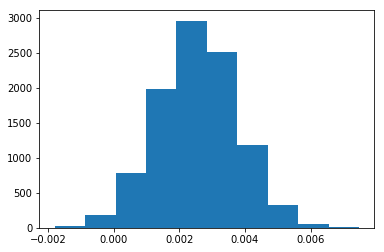

In [100]:
plt.hist(p_diffs);

The sampling distribution curve above appears to be normally distributed, which is what we would expect from the Central Limit Theorem.

Below I am trying to plot a sampling distribution from the standard deviation of the **p_diffs** values received earlier.

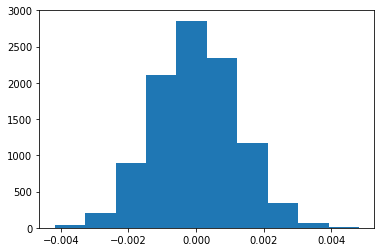

In [101]:
p_diffs = np.array(p_diffs)

# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# Plot the null distribution
plt.hist(null_vals);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [76]:
# Observed difference in ab_data.csv is the difference
# in conversion rate between now and ols landing pages
p_new_observed = df2.query(
    'group=="treatment" & converted==1').user_id.count() / df2.query(
    'group=="treatment"').user_id.count()
p_old_observed = df2.query('group=="control" & converted==1').user_id.count() / df2.query(
    'group=="control"').user_id.count()
p_observed = p_new_observed - p_old_observed

p_observed

-0.0015782389853555567

From the proportion above we see that the difference in conversion rate betwen the new and old landing pages is pretty low, with the old page performing slightly better.

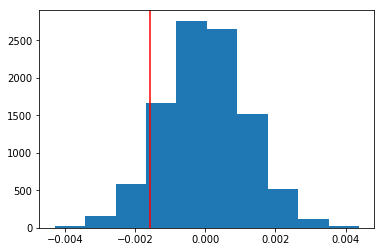

In [77]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# Plot the null distribution
plt.hist(null_vals);
plt.axvline(p_observed, c='red');

The new page has a lower mean conversion rate than the old page. I'll get the p-value to see the proportion of values observed from the null hypothesis greater than the observed values. 

In [78]:
# Compute p-value
(null_vals > p_observed).mean()

0.9093

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Above we got a p-value of 0.9093. Such a high p-value indicates that we cannot reject the null-hypothesis based on the data we collected. It seems that the conversion rate for the old page is slightly better than the new page. Since the difference is less than 1% we can not regard it as statistically significant. Finally, since the observed values lie close to the mean from the null hypothesis, we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [79]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [80]:
import statsmodels.api as sm

convert_old = df2.query('group=="control" & converted==1').user_id.count()
convert_new = df2.query('group=="treatment" & converted==1').user_id.count()
n_old = df2.query('group == "control"').user_id.count()
n_new = df2.query('group == "treatment"').user_id.count()

convert_old, convert_new, n_old, n_new

C:\Users\Saransh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [81]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old],[n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

**Note: **
Here I was initially getting the wrong result until I used the parameter: *alternative='larger'*. According to the documentation this should have been the default value, but apparently it was not and I have to specify it manually.

In [82]:
from scipy.stats import norm

norm.ppf(0.025)

-1.9599639845400545

**Conclusion from z-test**

Here we are using the z-test to check whether two proportions are significantly better than each other. Our null hypothesis is that the proportions (conversion rates versus number of observations) for the new page are smaller than or equal to the old page. Our alternative hypothesis states that the new page proportion is better than that for the old page.

95% of the values will be greater than -1.95. Our z-score is greater than the confidence value, so we fail to reject the null hypothesis.

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A z-score is the number of standard deviations from the mean a data point is. Above we calculated the critical value for a 95% confidence interval to be 1.95996. Our z-score is smaller than the critical value, which means that the sample mean lies within a 95% confidence interval of our distribution. Therefore we fail to reject the null hypothesis. **

**The p-values I received in both cases are similar. The manual calculation gave me a p-value of 0.814, while the z-test gave 0.905. **

Before going to the regression section, I'll store the cleaned data df2 to a csv, so I can access it quickly later.

In [83]:
df2.to_csv('clean_data_df2.csv', index=False)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since our dependent variable(conversion) can be expressed as either 0 or 1, we can perform logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [84]:
df2 = pd.read_csv('clean_data_df2.csv')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [85]:
df2[['ab_page', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


We can remove the extra column *treatment*

In [86]:
df2 = df2.drop('treatment', axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [87]:
import statsmodels.api as sm

df2['intercept'] = 1

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Jan 2018   Pseudo R-squ.:               8.077e-06
Time:                        17:28:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [88]:
np.exp(0.0150)

1.0151130646157189

The above value indicates how likely a user is to convert, if he is shown the new page.

** Summary of the regression model **

The model tries to predict the likelihood of a user converting, given that they have been served a **treatment** page. From the calculations above we can predict that the user is **1.015 times less likely** to convert if he is shown the new page, *keeping all other factors constant.*

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

The **p-value** associated with ab_page is **0.190**. In contrast the p-value we got in **Part II** was **0.8**. The reason these values are different is because these models are predicting different values. Teh regerssion is essentially a **two-sided test** as opposed to the one sided A/B test we performed in Part II. Essentially our alternate hypothesis in Part II was testing whether new_page is better than the old_page. In Part III (regression) we are asking the question whether the new_page is *different* than the old_page.
$$H_0: p_{new}  = p_{old}$$
$$H_1: p_{new}  \neq p_{old}$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other things that might affect whether a user converts or not can include the geographical location of the user, the duration the user was on the page, what features/buttons user interacted with while he was on the page, etc. If we have data for these other factors, we can add them to our model to make a prediction. The disadvantage of having a lot of terms in the model might be that we can only predict how one factor affects the result by keeping other factors constant. Too many models introduce a lot of variables and it is hard to keep them constant while studying only one constant.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [89]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [90]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1


In [91]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

Since we have 3 unique country values in the dataset we'll have to use two dummy variables to represent them. I'll initially create three dummy variables and then remove one of them.

In [92]:
### Create the necessary dummy variables
df_new[['ca', 'uk', 'us']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('ca', axis = 1)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,uk,us
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [93]:
### Fit Your Linear Model And Obtain the Results

df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'uk', 'us']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 20 Jan 2018   Pseudo R-squ.:               2.323e-05
Time:                        17:28:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
uk             0.0506      0.028      1.784      0.074      -0.005       0.106
us             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [94]:
np.exp(0.0149)

1.0150115583846535

In [95]:
np.exp(0.0506)

1.0519020483004984

In [96]:
np.exp(0.0408)

1.0416437559600236

<a id='conclusions'></a>
## Conclusions

Here are a few of the conclusions I derived from the model above:
1. A user is UK is 1.05 times more likely to convert than a user in Canada, keeping all other factors constant.
2. A user in US id 1.04 times more likely to convert than a user in Canada, keeping all other factors constant.



### Resources ###

https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa-in-python/20864883

https://statistics.laerd.com/statistical-guides/standard-score-3.php

http://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

Udacity Data Analyst Nanodegree program: https://www.udacity.com/course/data-analyst-nanodegree--nd002